<a href="https://colab.research.google.com/github/lukmanirwan0807-sys/JST-FP/blob/main/JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
!unzip JST.zip -d dataset


Archive:  JST.zip
   creating: dataset/JST/
   creating: dataset/JST/Testing/
   creating: dataset/JST/Testing/Fire/
  inflating: dataset/JST/Testing/Fire/2072.jpg  
  inflating: dataset/JST/Testing/Fire/2073.jpg  
  inflating: dataset/JST/Testing/Fire/2074.jpg  
  inflating: dataset/JST/Testing/Fire/2075.jpg  
  inflating: dataset/JST/Testing/Fire/2076.jpg  
  inflating: dataset/JST/Testing/Fire/2077.jpg  
  inflating: dataset/JST/Testing/Fire/2078.jpg  
  inflating: dataset/JST/Testing/Fire/2079.jpg  
  inflating: dataset/JST/Testing/Fire/2080.jpg  
  inflating: dataset/JST/Testing/Fire/2081.jpg  
  inflating: dataset/JST/Testing/Fire/2082.jpg  
  inflating: dataset/JST/Testing/Fire/2083.jpg  
  inflating: dataset/JST/Testing/Fire/2084.jpg  
  inflating: dataset/JST/Testing/Fire/2085.jpg  
  inflating: dataset/JST/Testing/Fire/2086.jpg  
  inflating: dataset/JST/Testing/Fire/2087.jpg  
  inflating: dataset/JST/Testing/Fire/2088.jpg  
  inflating: dataset/JST/Testing/Fire/2089.jpg  
 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(
    "/content/dataset/JST/Training",
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_dataset = test.flow_from_directory(
    "/content/dataset/JST/Testing",
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)


Found 3180 images belonging to 2 classes.
Found 714 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'Fire': 0, 'Non Fire': 1}

Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model

In [ ]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7978 - loss: 0.4318

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.7983 - loss: 0.4310 - val_accuracy: 0.8599 - val_loss: 0.2910
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.8985 - loss: 0.2354 - val_accuracy: 0.9188 - val_loss: 0.2290
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9125 - loss: 0.1992 - val_accuracy: 0.9146 - val_loss: 0.2165
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9276 - loss: 0.1758 - val_accuracy: 0.9034 - val_loss: 0.2108
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.9329 - loss: 0.1590 - val_accuracy: 0.9174 - val_loss: 0.2134
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9496 - loss: 0.1271 - val_accuracy: 0.9174 - val_loss: 0.1981
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9681 - loss: 0.0937 - val_accuracy: 0.9216 - val_loss: 0.2042
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.9672 - loss: 0.0910 - val_accuracy: 0.882

Predicting on Test Dataset

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 465ms/step


In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
print(len(predictions))

714


Plotting loss per iteration

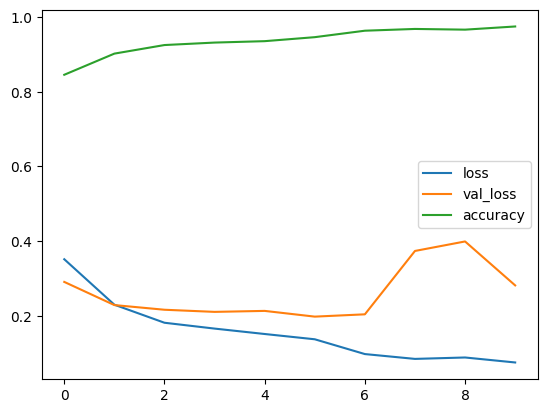

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

Plotting accuracy per iteration

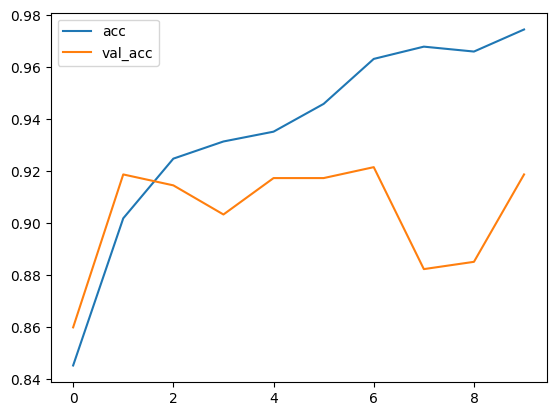

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
[[0.]]


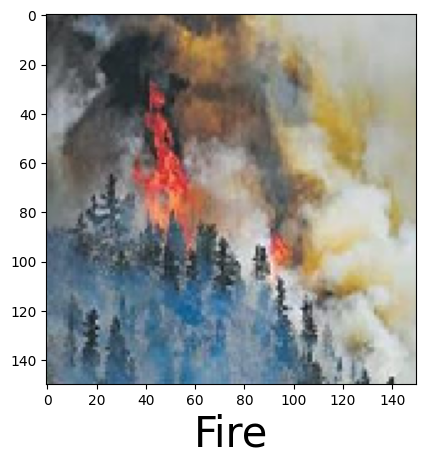

In [ ]:
predictImage("/content/dataset/JST/Testing/Fire/2072.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.]]


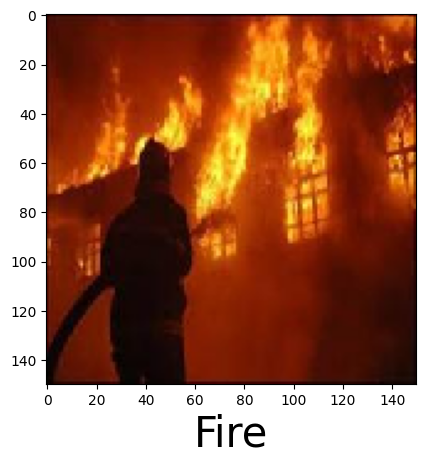

In [ ]:
predictImage("/content/dataset/JST/Testing/Fire/2082.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[1.]]


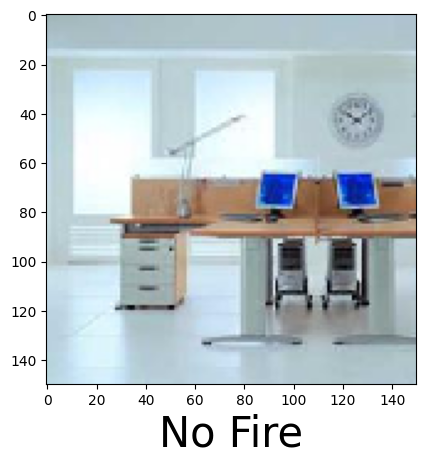

In [ ]:
predictImage("/content/dataset/JST/Testing/Non Fire/901.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[0.]]


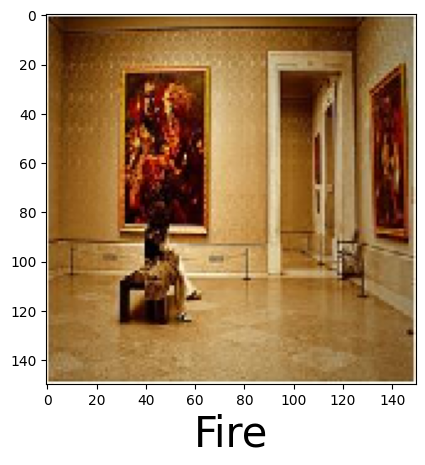

In [ ]:
predictImage("/content/dataset/JST/Testing/Non Fire/795.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[1.]]


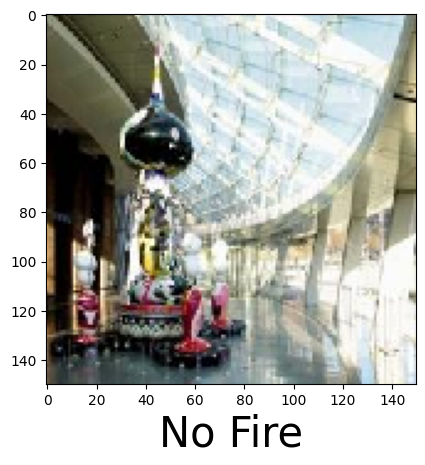

In [ ]:
predictImage("/content/dataset/JST/Testing/Non Fire/840.jpg")

In [ ]:
predictImage("")

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




-----

